In [1]:
import meld

In [2]:
from sotip import *
import numpy as np
import scanpy as sc


In [3]:
def random_spatial(num_cells,x_range,y_range):
# num_cells = adata_sub.shape[0]
# x_range = (0,100)
# y_range = (0,100)

    x_random = np.random.random(size=(num_cells,))*(x_range[1]-x_range[0])+x_range[0]
    y_random = np.random.random(size=(num_cells,))*(y_range[1]-y_range[0])+y_range[0]
    spatial_mat = np.vstack([x_random,y_random]).transpose()
    return  spatial_mat


In [102]:
adata = sc.read_h5ad('simulation_data/simulation3.h5ad')

In [103]:
adata

AnnData object with n_obs × n_vars = 3000 × 1000
    obs: 'gt_ct'

In [104]:
ct_names = np.array(adata.obs['gt_ct'])
ct_names_new = [s[1:-1] for s in ct_names]
adata.obs['gt_ct'] = ct_names_new
adata.obs['gt_ct'] = adata.obs['gt_ct'].astype('category')

In [105]:
def get_adata_by_order(order,adata_source):
    adata = adata_source.copy()
    order_ct = [f'Group{i}' for i in order]
    spatial_mat = np.zeros(shape=(adata.shape[0],2))
    for i in range(len(order_ct)):
        ct = order_ct[i]
        cur_ct_id = np.where(adata.obs['gt_ct']==ct)[0]
        cur_num_cells = len(cur_ct_id)
        cur_spatial = random_spatial(cur_num_cells,[30*(i),30*(i+1)],[0,90])
        spatial_mat[cur_ct_id] = cur_spatial
        # region_array[cur_ct_id] =  
    adata.obsm['spatial'] = spatial_mat
    return adata

In [106]:
adata1 = get_adata_by_order([1,2,3],adata)
adata2 = get_adata_by_order([2,3,1],adata)


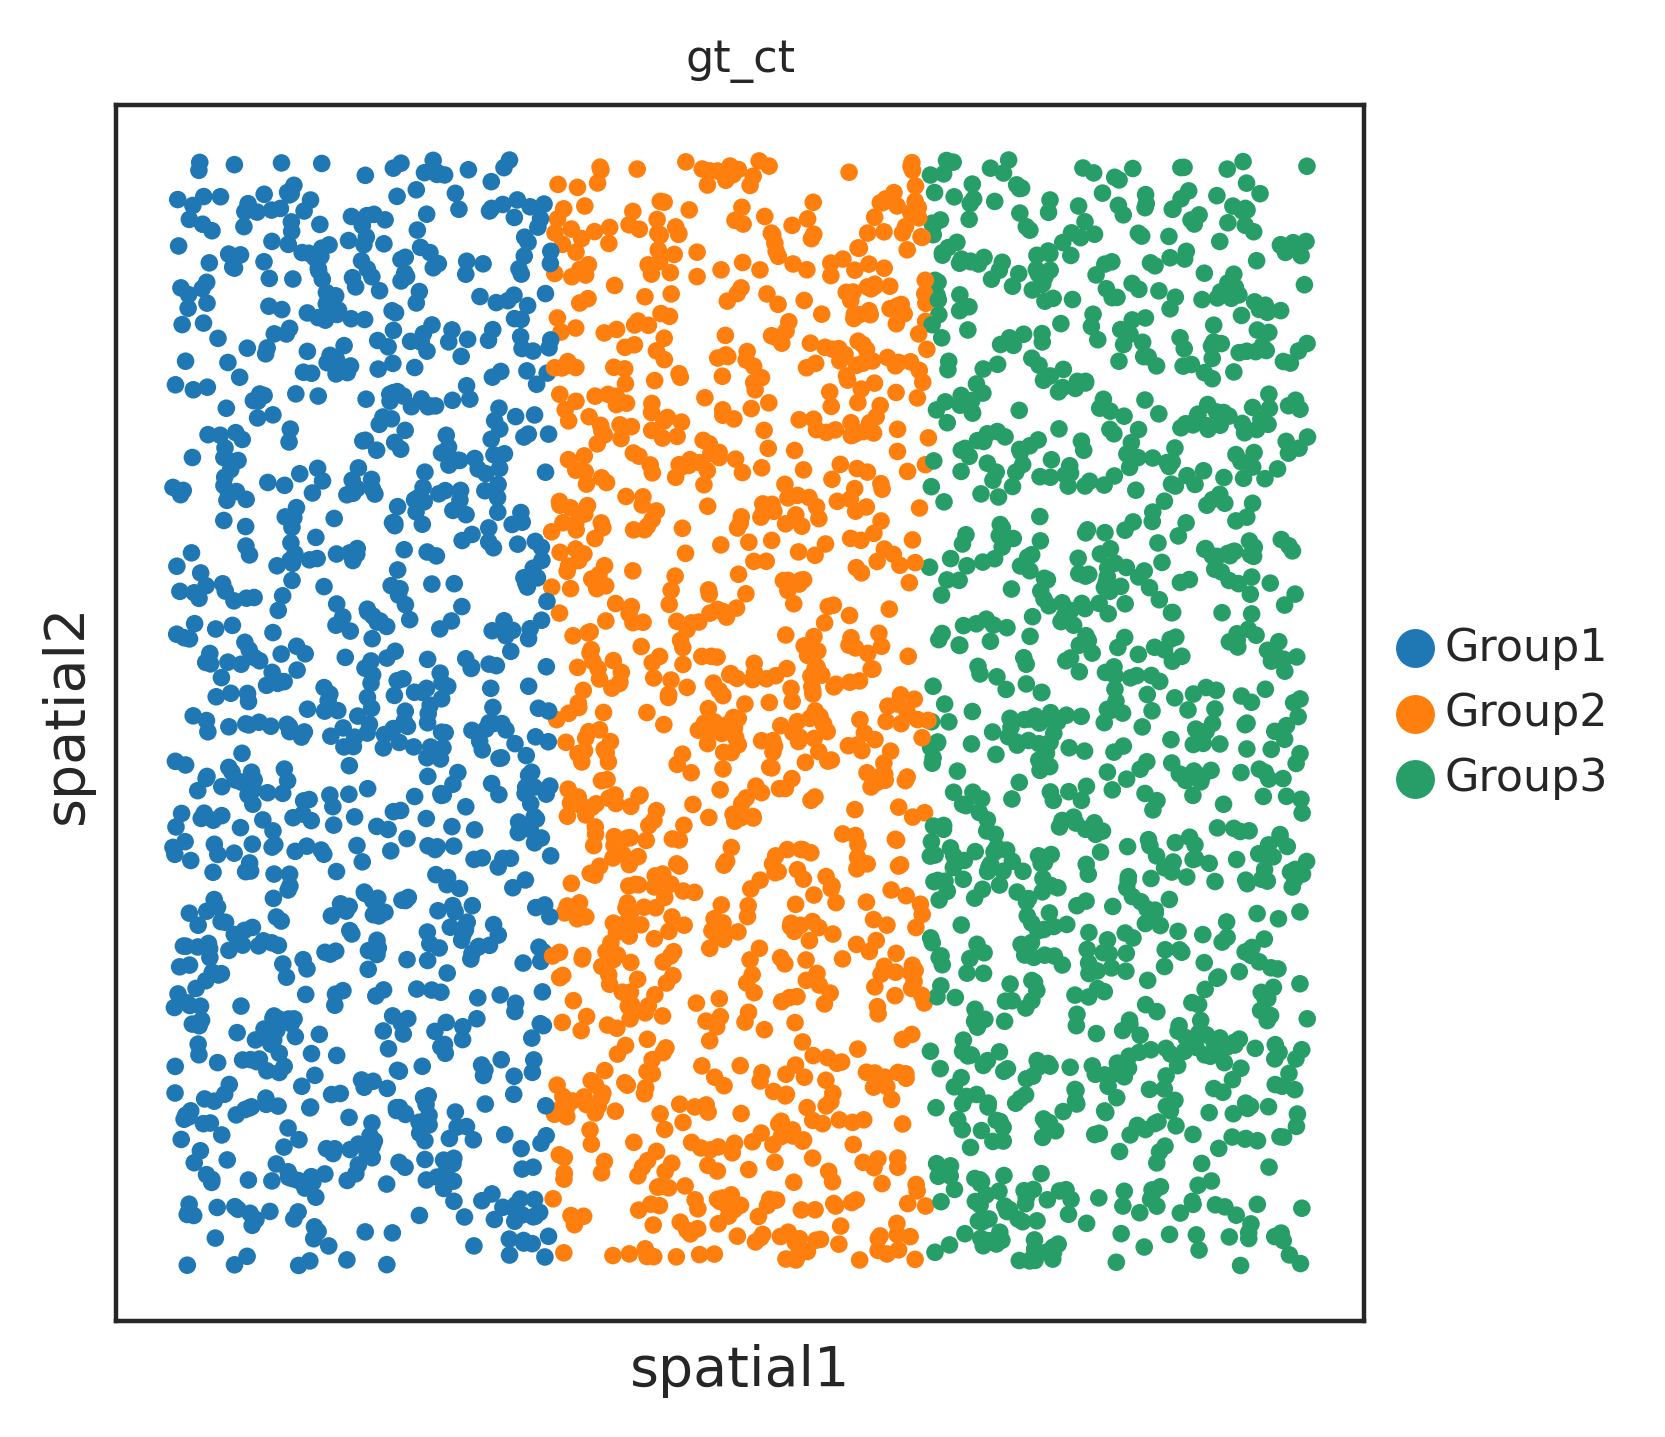

In [107]:
sc.pl.embedding(adata1,basis='spatial',color='gt_ct')

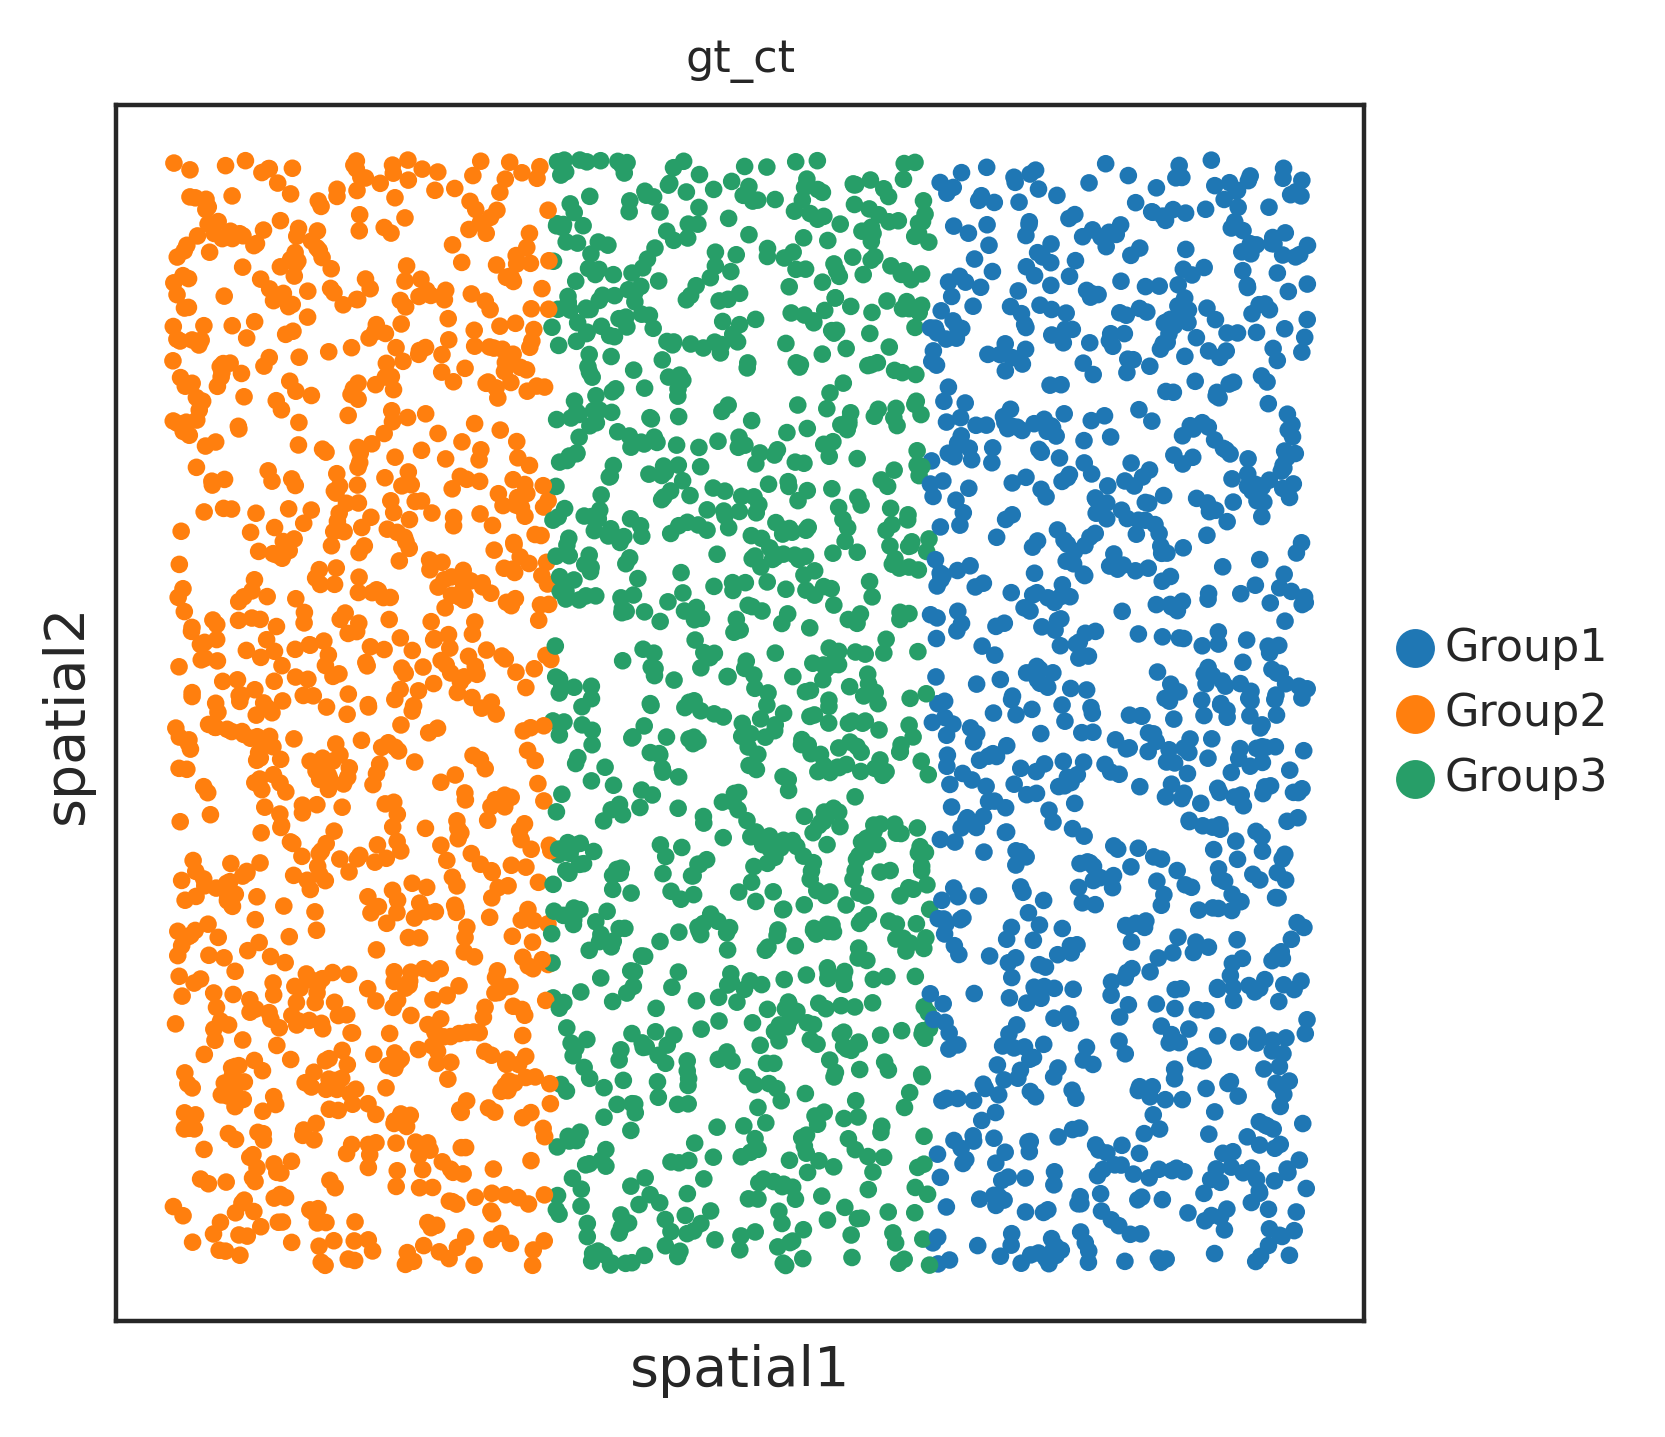

In [108]:
sc.pl.embedding(adata2,basis='spatial',color='gt_ct')

In [109]:
adata = adata1.concatenate([adata2])

In [110]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)



knn search time cost 0.02189922332763672 s
0 MEs,time cost 1.9073486328125e-06 s, 3000 MEs, 5.7220458984375e-06s left
1000 MEs,time cost 0.16303372383117676 s, 2000 MEs, 0.3260674476623535s left
2000 MEs,time cost 0.1552278995513916 s, 1000 MEs, 0.1552278995513916s left
knn search time cost 0.021708011627197266 s
0 MEs,time cost 1.9073486328125e-06 s, 3000 MEs, 5.7220458984375e-06s left
1000 MEs,time cost 0.15648150444030762 s, 2000 MEs, 0.31296300888061523s left
2000 MEs,time cost 0.1629483699798584 s, 1000 MEs, 0.1629483699798584s left


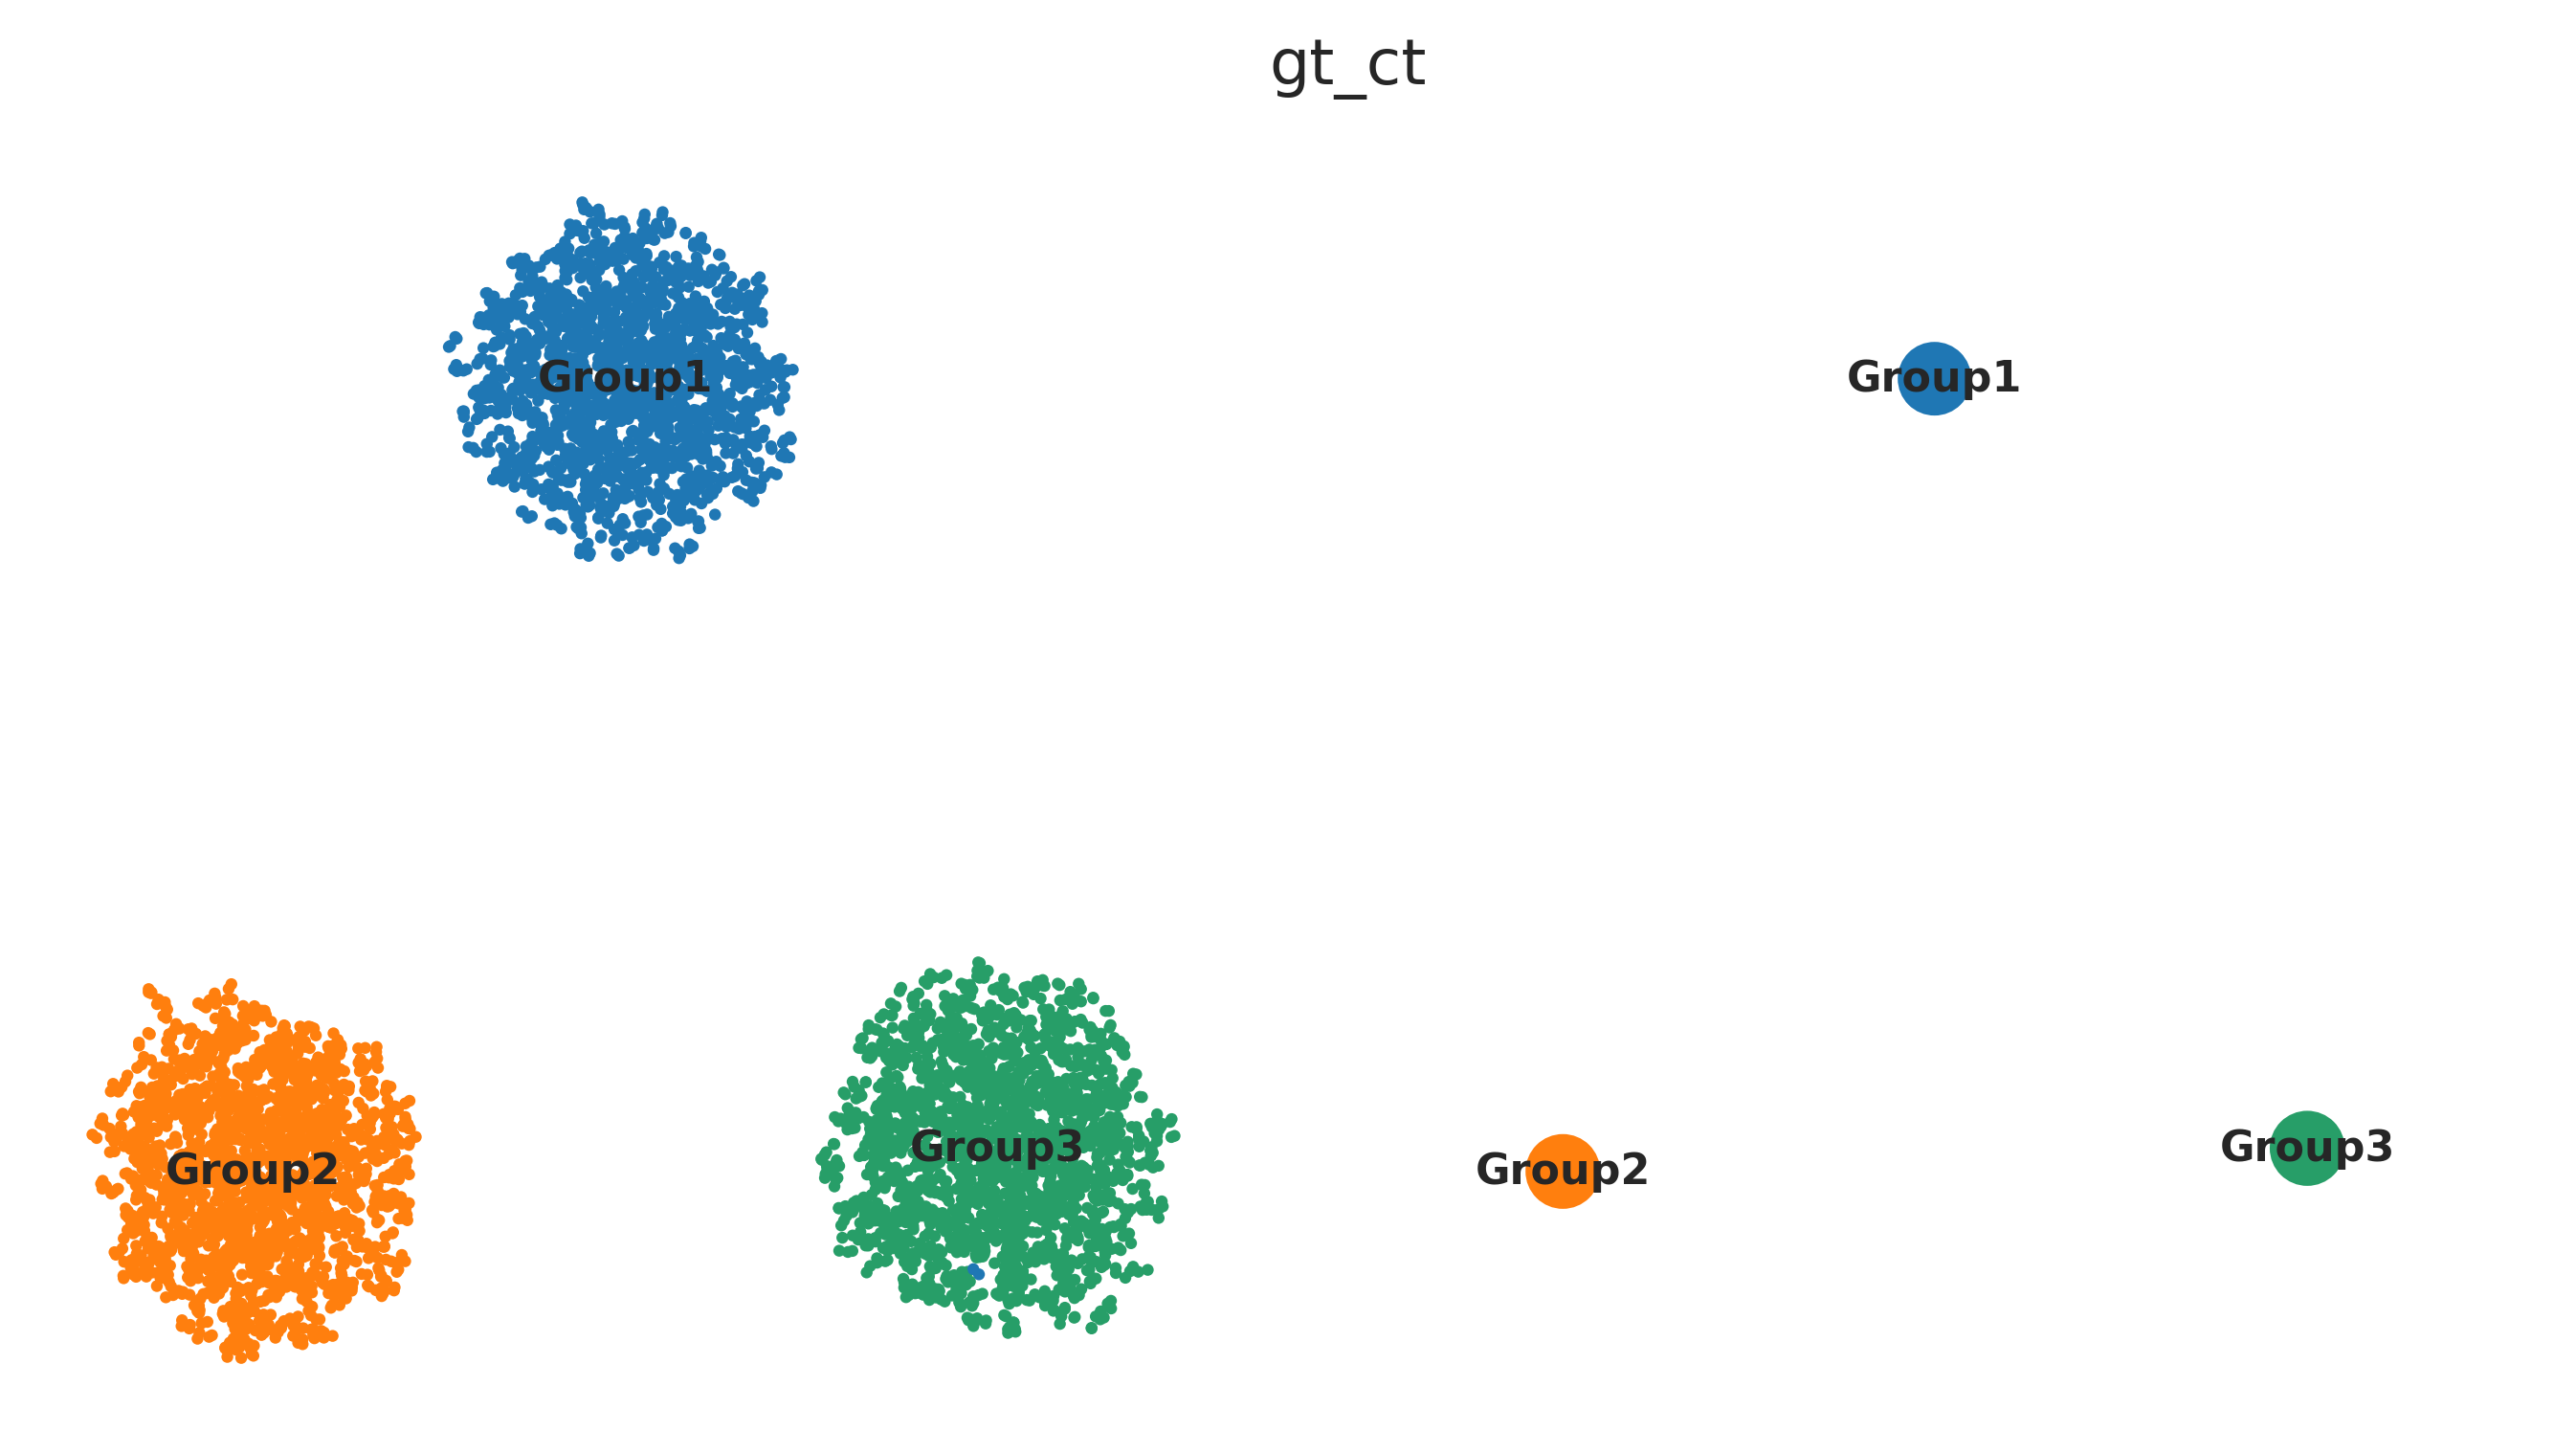

In [111]:
knn = 50
spatial_var='spatial'
cls_key='gt_ct'
ME_var_names_np_unique = np.unique(adata.obs[cls_key]) 
MED_multi(adata,use_cls=cls_key,nn=knn,copy=False,ME_var_names_np_unique=ME_var_names_np_unique,spatial_var=spatial_var,batch_obs='batch')
# MED(adata,use_cls=cls_key,nn=knn,copy=False,ME_var_names_np_unique=ME_var_names_np_unique,spatial_var=spatial_var) 
sc.tl.paga(adata,groups=cls_key)
sc.pl.paga_compare(adata,basis='X_umap')    


In [43]:
adata

AnnData object with n_obs × n_vars = 6000 × 1000
    obs: 'gt_ct', 'batch'
    uns: 'pca', 'neighbors', 'umap', 'gt_ct_colors', 'paga', 'gt_ct_sizes'
    obsm: 'spatial', 'X_pca', 'X_umap', 'ME'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [112]:
gd_method = 'euclidean'
gd = get_ground_distance(adata,method=gd_method,cls_key=cls_key,embed_key=None,connect_threshold=0.5)  



In [113]:
heter_key = 'ME_heter_{0}_{1}'.format(cls_key,gd_method)
cal_ME_heterogeneity(adata,copy=False,key_added=heter_key) 

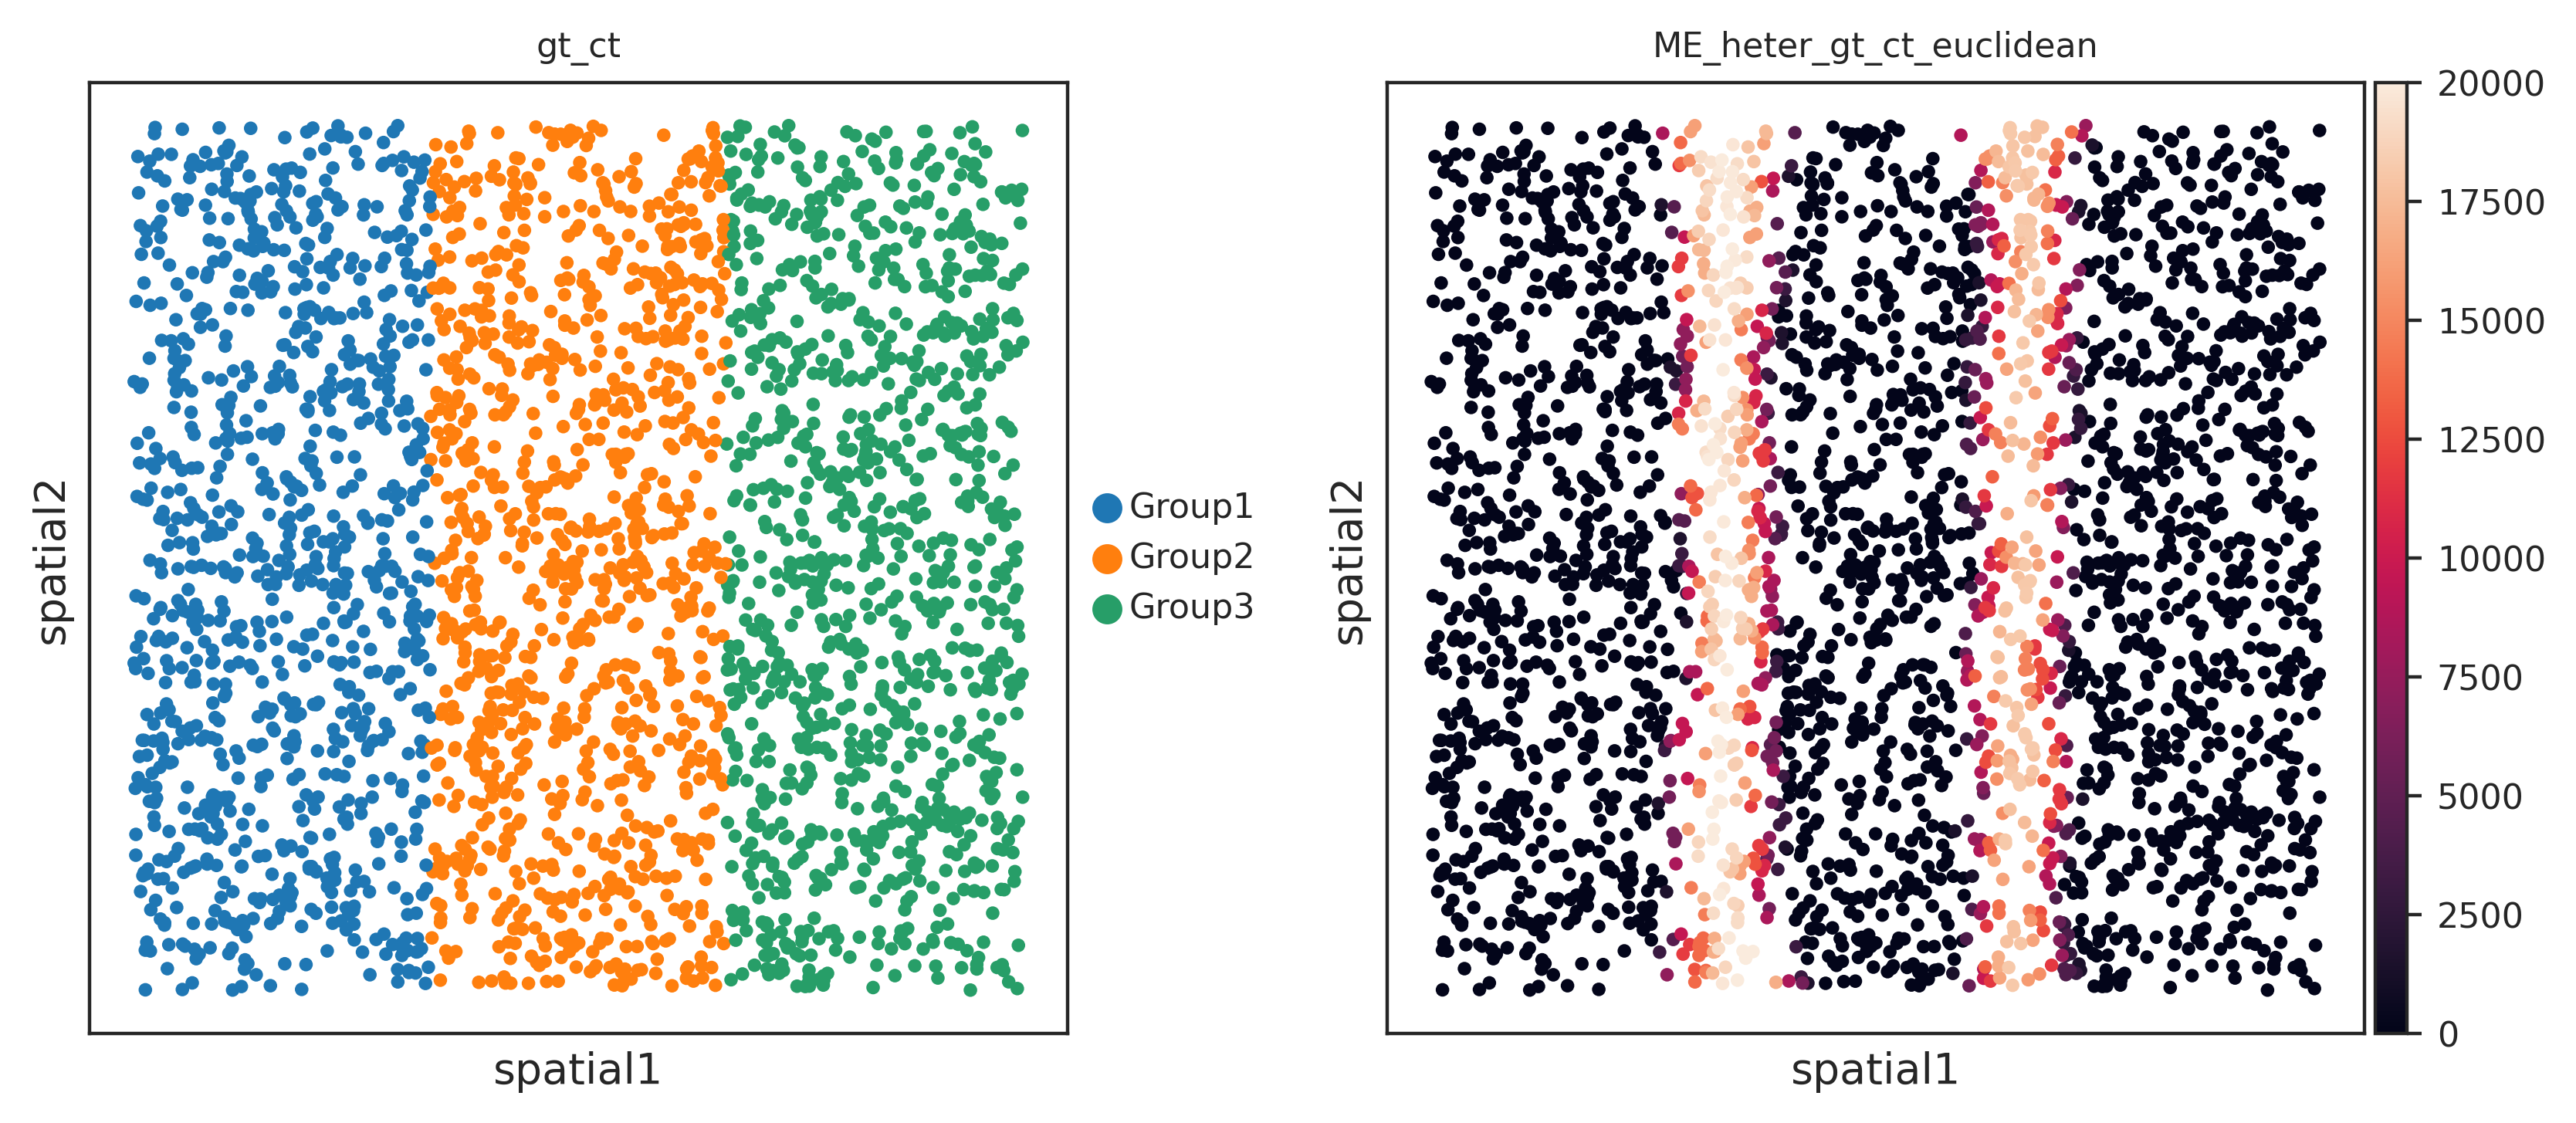

In [114]:
sc.pl.embedding(adata[adata.obs['batch']=='0'],basis='spatial',color=['gt_ct',heter_key])

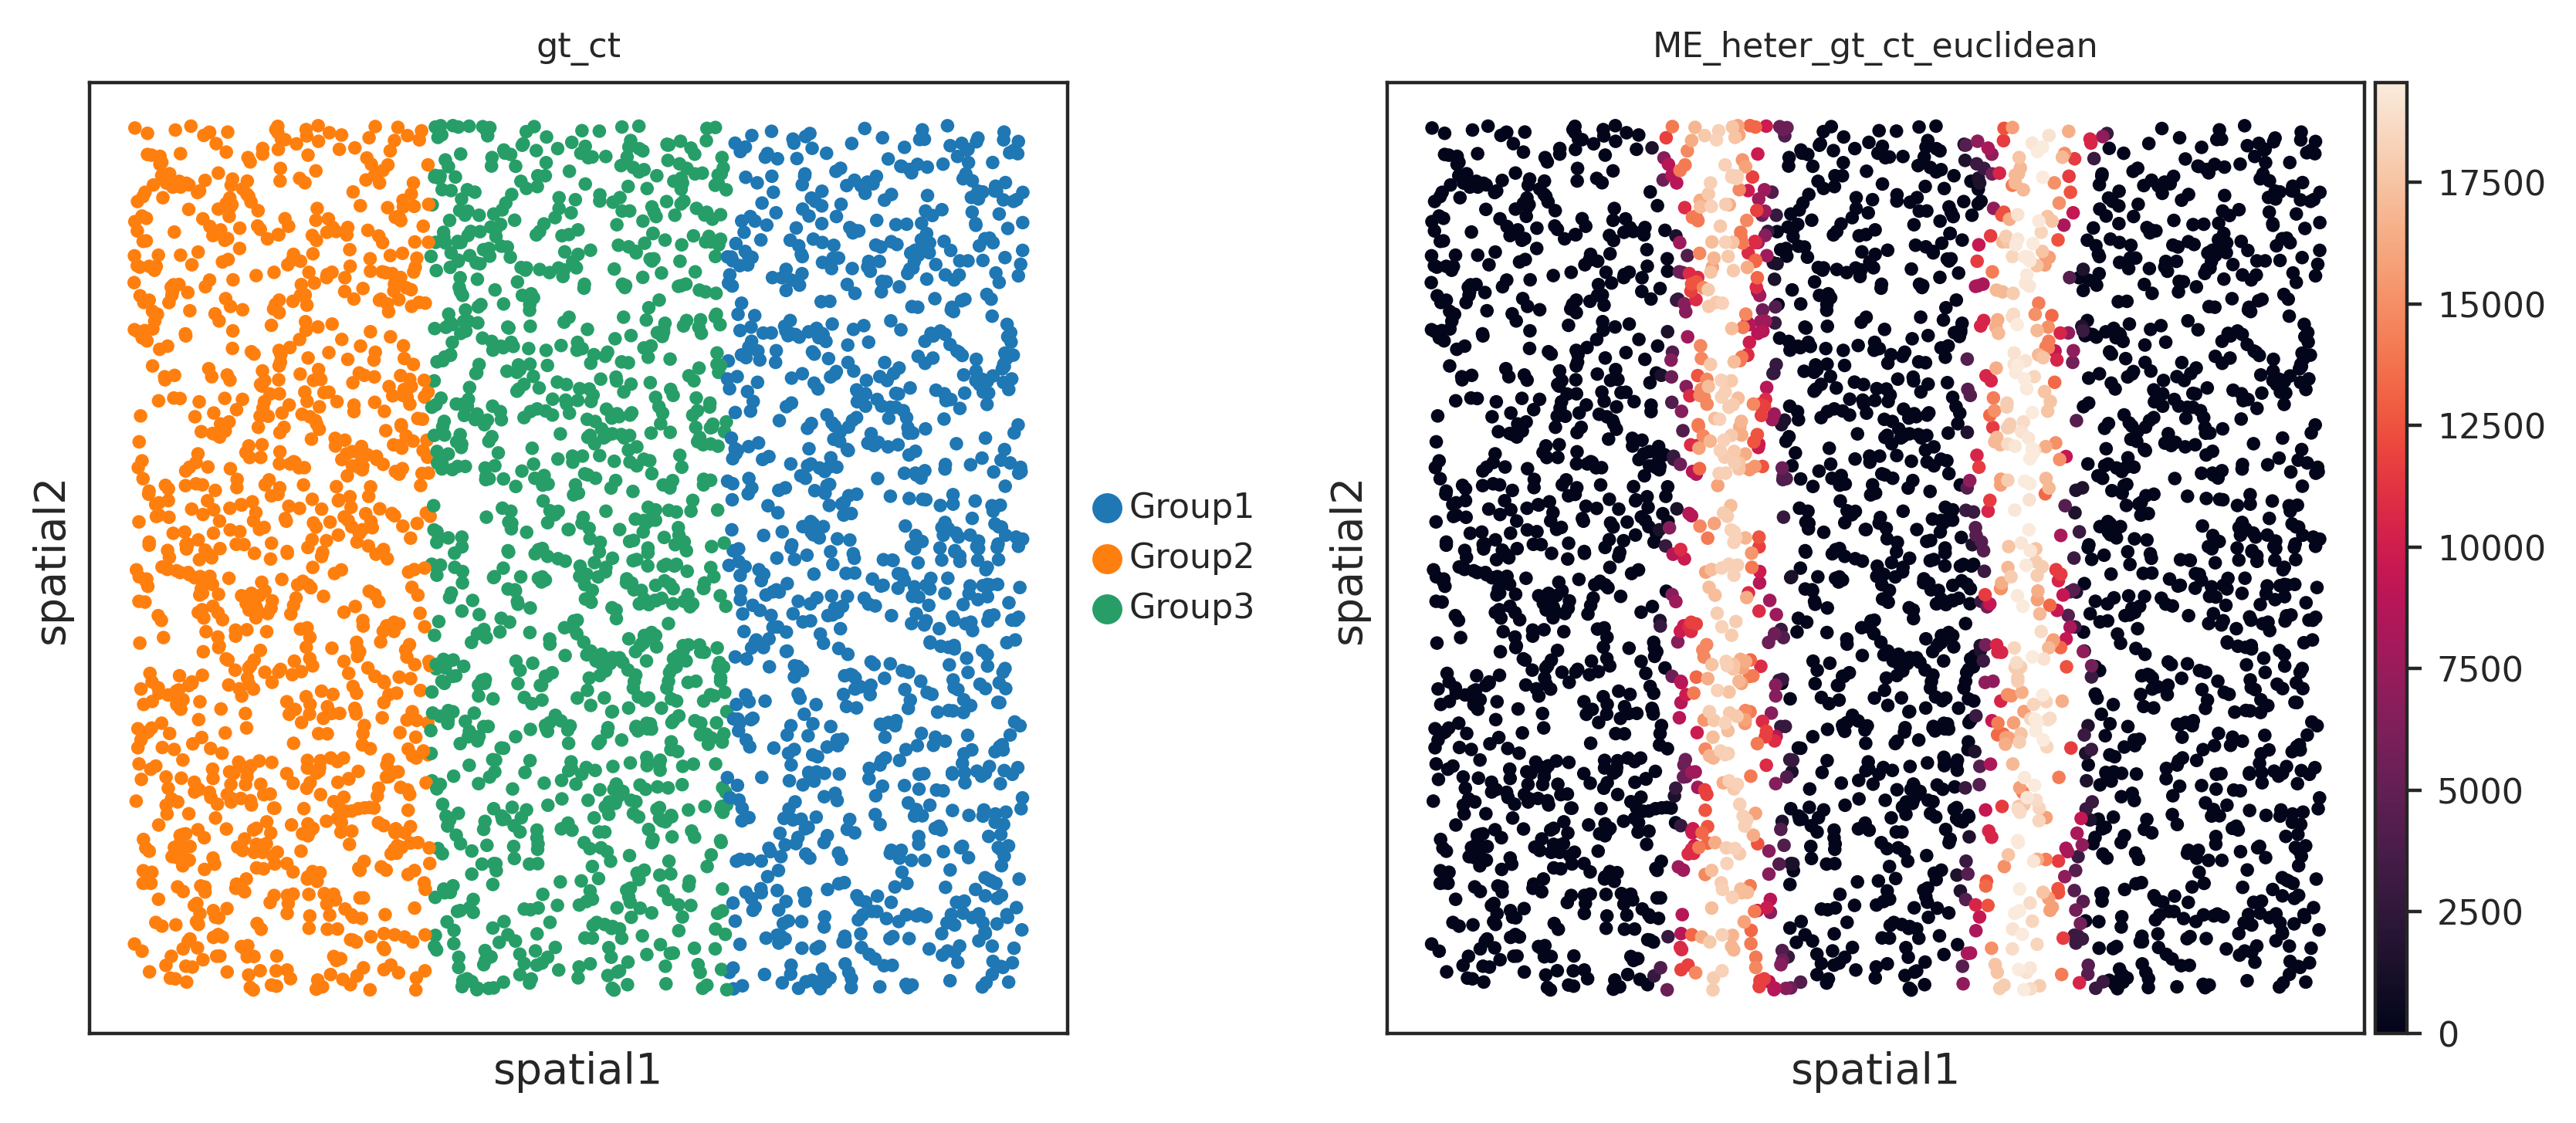

In [115]:
sc.pl.embedding(adata[adata.obs['batch']=='1'],basis='spatial',color=['gt_ct',heter_key])

In [116]:
adata_phEMD = MED_phEMD(
    adata.copy(),
    GD_method=gd_method,
    MED_knn=knn,
    CT_obs=cls_key,
    ifspatialplot=False,
    OT_method='pyemd',
    ME_precompyted=True,
    GD_precomputed=True
)


0 1638616434.0892994
100 14.523440837860107
200 14.202860355377197
300 13.997166872024536
400 13.692846775054932
500 13.475530624389648
600 13.146815776824951
700 12.856961250305176
800 12.655130386352539
900 12.431756019592285
1000 12.223675966262817
1100 12.00183653831482
1200 11.713218450546265
1300 11.553224086761475
1400 11.240396499633789
1500 10.952946186065674
1600 10.789811134338379
1700 10.505884408950806
1800 10.271645307540894
1900 10.108668327331543
2000 9.825987577438354
2100 9.626967668533325
2200 9.309739589691162
2300 9.055906534194946
2400 8.807854652404785
2500 8.621598482131958
2600 8.312160968780518
2700 8.093382835388184
2800 7.841559171676636
2900 7.638277769088745
3000 7.382683038711548
3100 7.135693311691284
3200 6.897190093994141
3300 6.677349328994751
3400 6.424868106842041
3500 6.14668607711792
3600 5.903268575668335
3700 5.67143702507019
3800 5.446777820587158
3900 5.211365699768066
4000 4.971119403839111
4100 4.7157676219940186
4200 4.479996681213379
4300 

In [118]:
import graphtools as gt

In [ ]:
emd_distmat = (adata_phEMD.obsm['X_ME_EMD_mat'])

G = gt.Graph(emd_distmat,precomputed='distance',knn=100)

In [120]:
meld_op = meld.MELD()
sample_densities = meld_op.fit_transform(G, sample_labels=adata.obs['batch'])

Building graph on precomputed distance matrix with 6000 samples.


In [121]:
sample_densities

0         1
0     0.000169  0.000164
1     0.000182  0.000152
2     0.000182  0.000152
3     0.000182  0.000152
4     0.000154  0.000179
...        ...       ...
5995  0.000182  0.000152
5996  0.000166  0.000167
5997  0.000166  0.000167
5998  0.000153  0.000180
5999  0.000182  0.000152

[6000 rows x 2 columns]

In [122]:
adata.obs['DMA_0'] = sample_densities.values[:,0]
adata.obs['DMA_1'] = sample_densities.values[:,1]

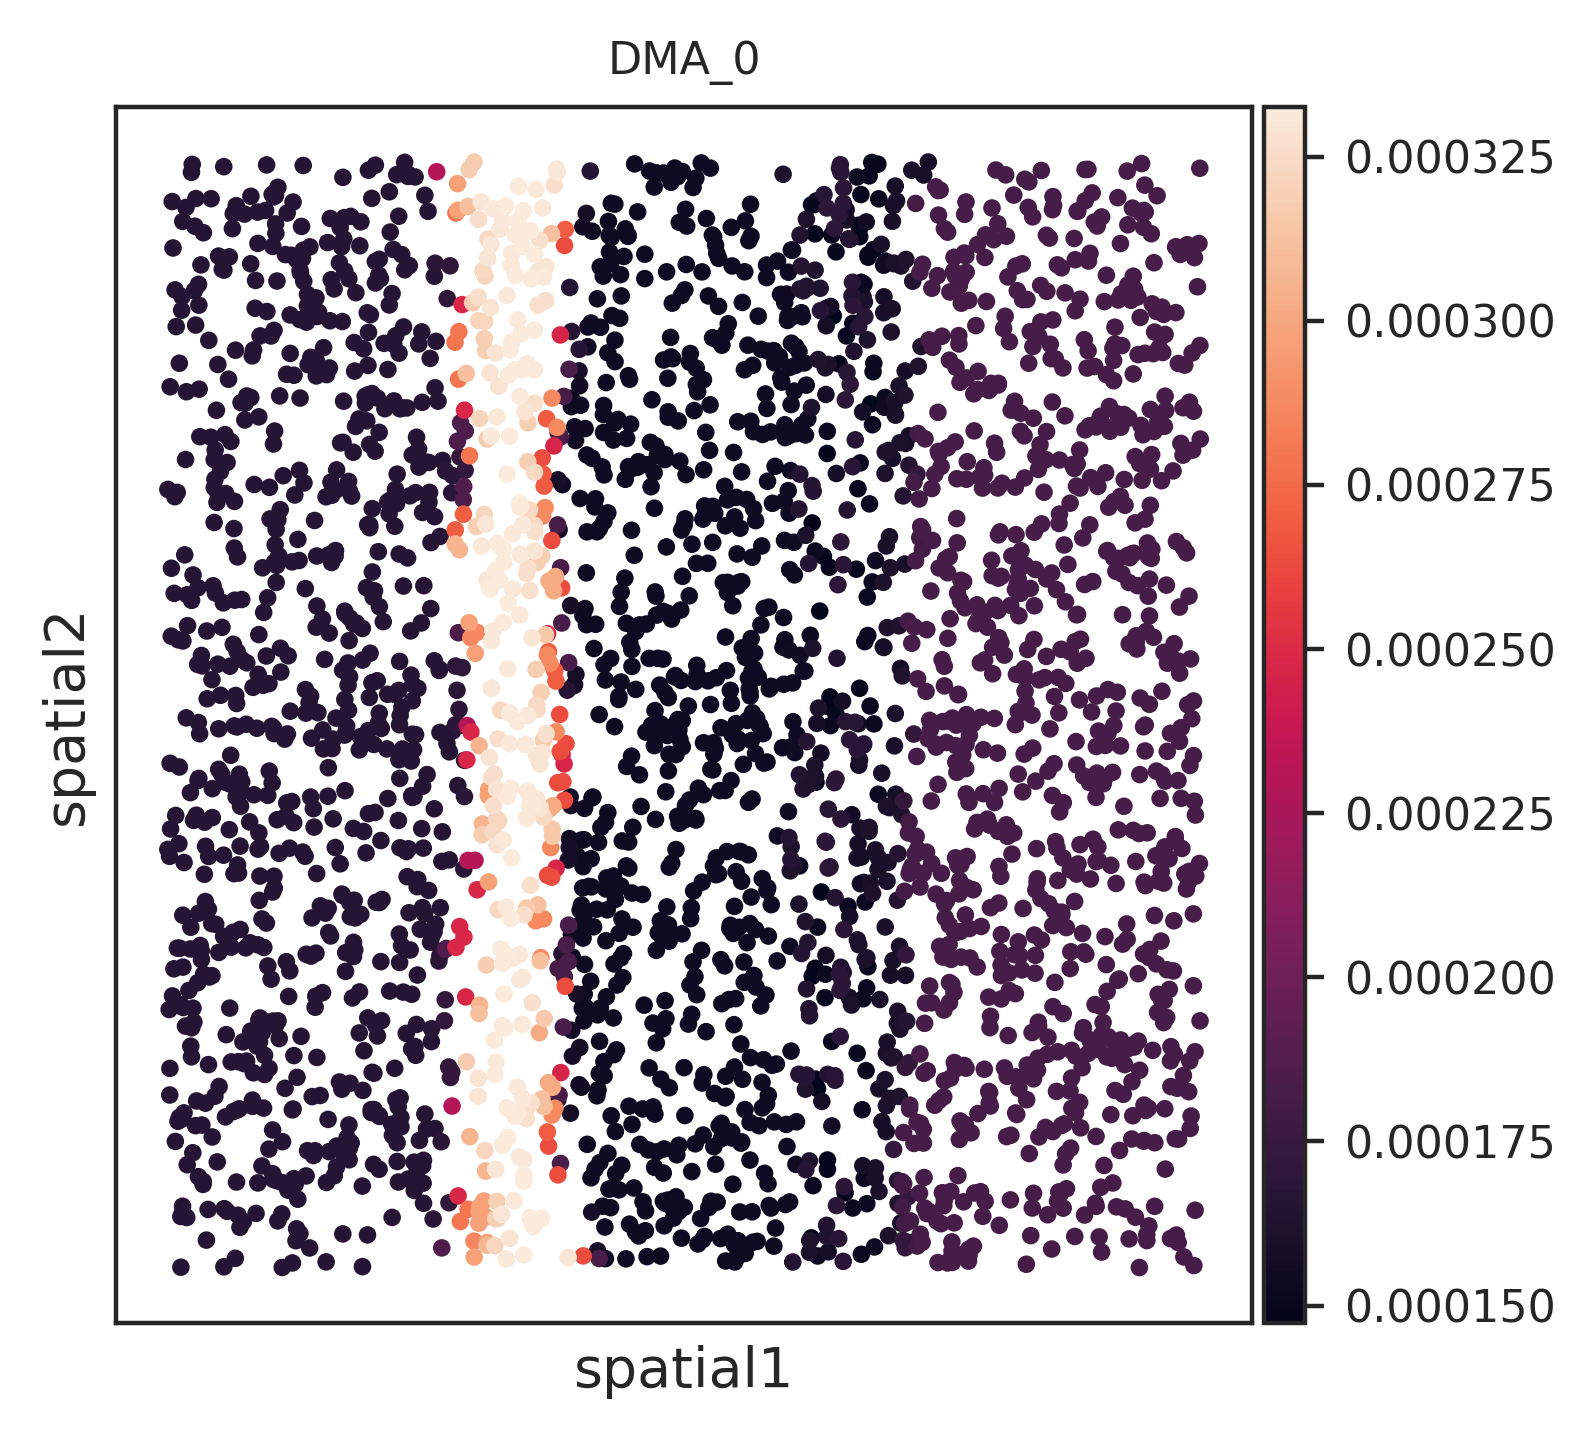

In [123]:
sc.pl.embedding(adata[adata.obs['batch']=='0'],basis='spatial',color=['DMA_0'])

Text(0.5, 1.0, '125_heter')

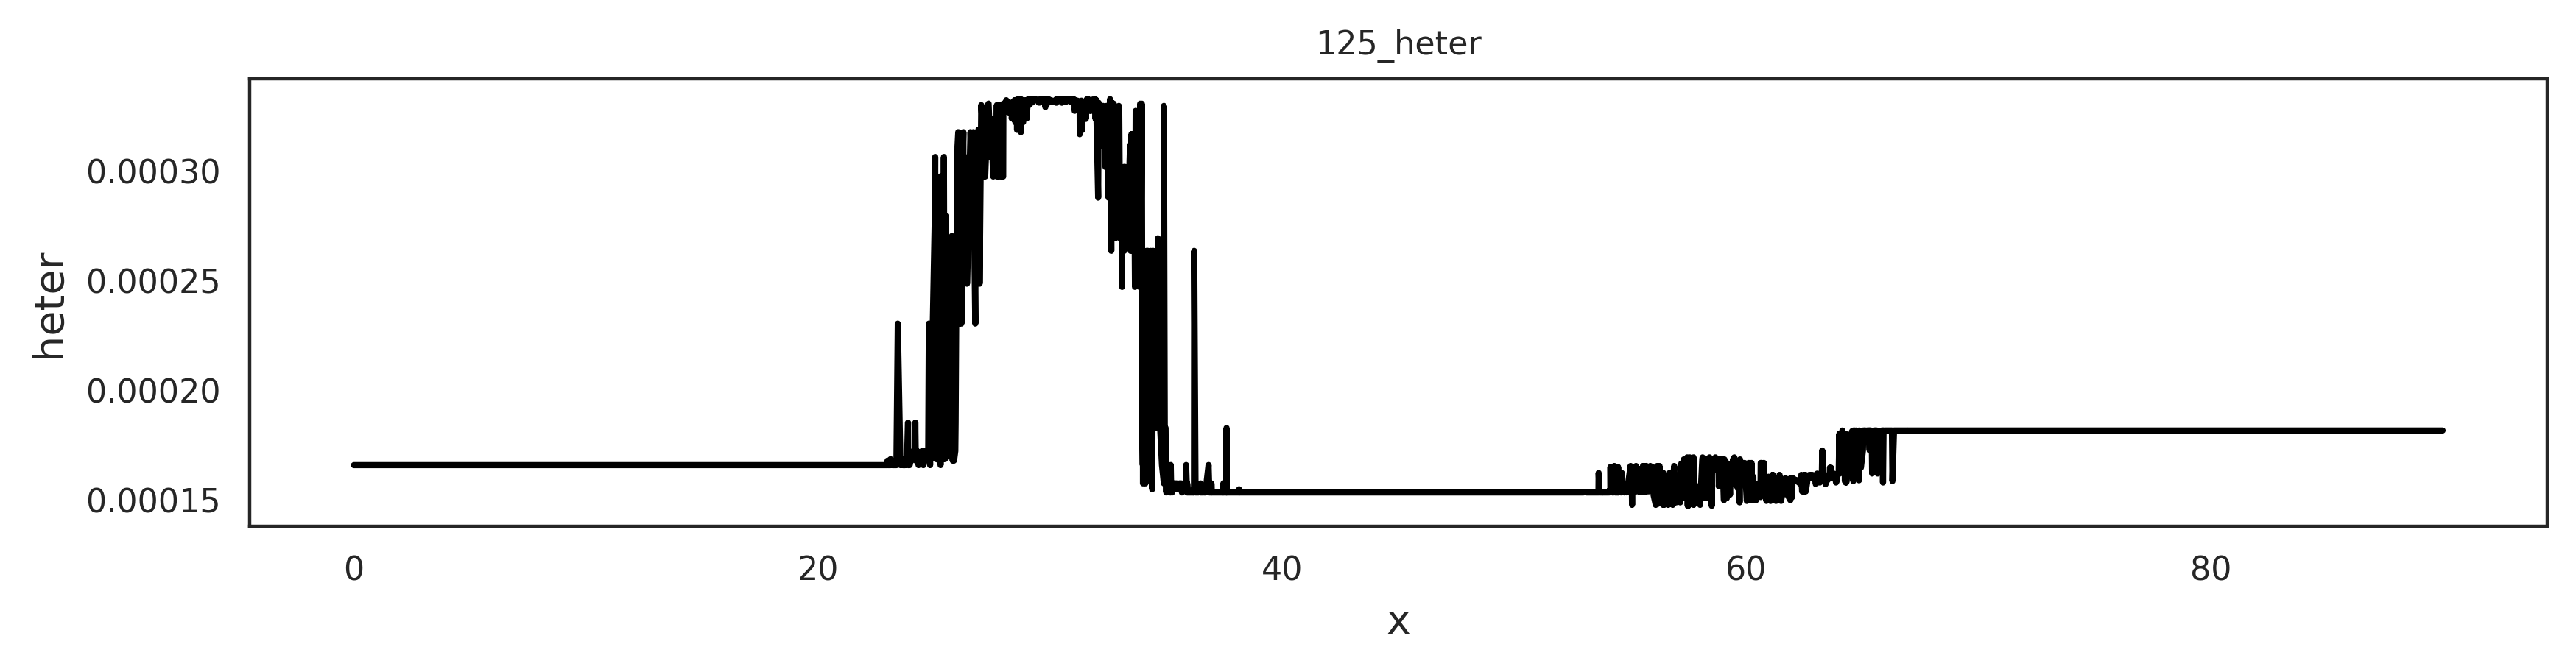

In [126]:
adata_use = adata[adata.obs['batch']=='0']

spatial_mat = adata_use.obsm['spatial']
heter_array = adata_use.obs['DMA_0']
pd_dict = {
    'x':spatial_mat[:,0],
    'y':spatial_mat[:,1],
    'heter':heter_array
}
pd_df = pd.DataFrame(pd_dict)
fig,ax = plt.subplots(1,1,figsize=(10,2))
ax = sns.lineplot(x="x", y="heter",
             # hue="method", 
             # data=pd_df[pd_df['method']!='sum'],
             data=pd_df,
             color='k'
                  
                  # c='k'
            )
plt.title('125_heter')
# ax.get_legend().remove()

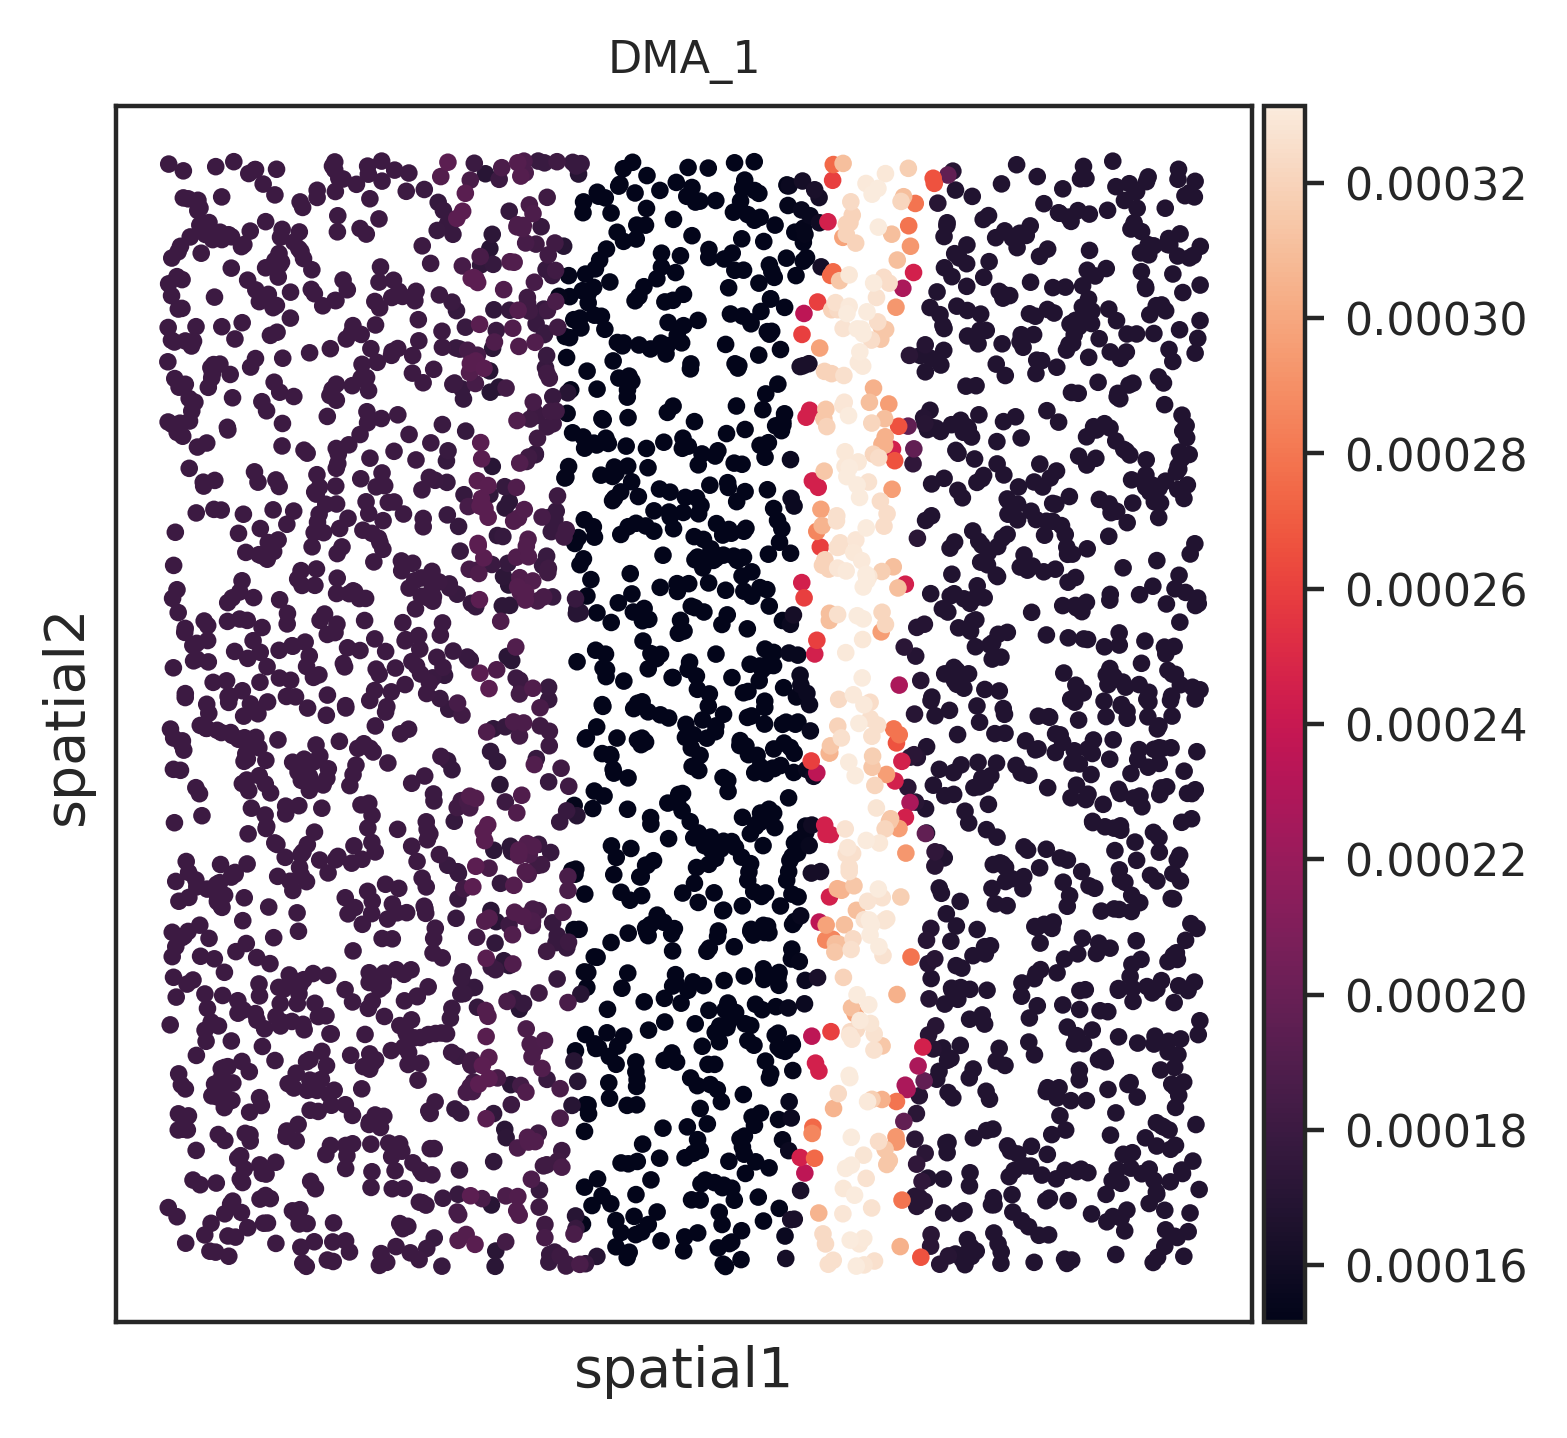

In [124]:
sc.pl.embedding(adata[adata.obs['batch']=='1'],basis='spatial',color=['DMA_1'])

Text(0.5, 1.0, '125_heter')

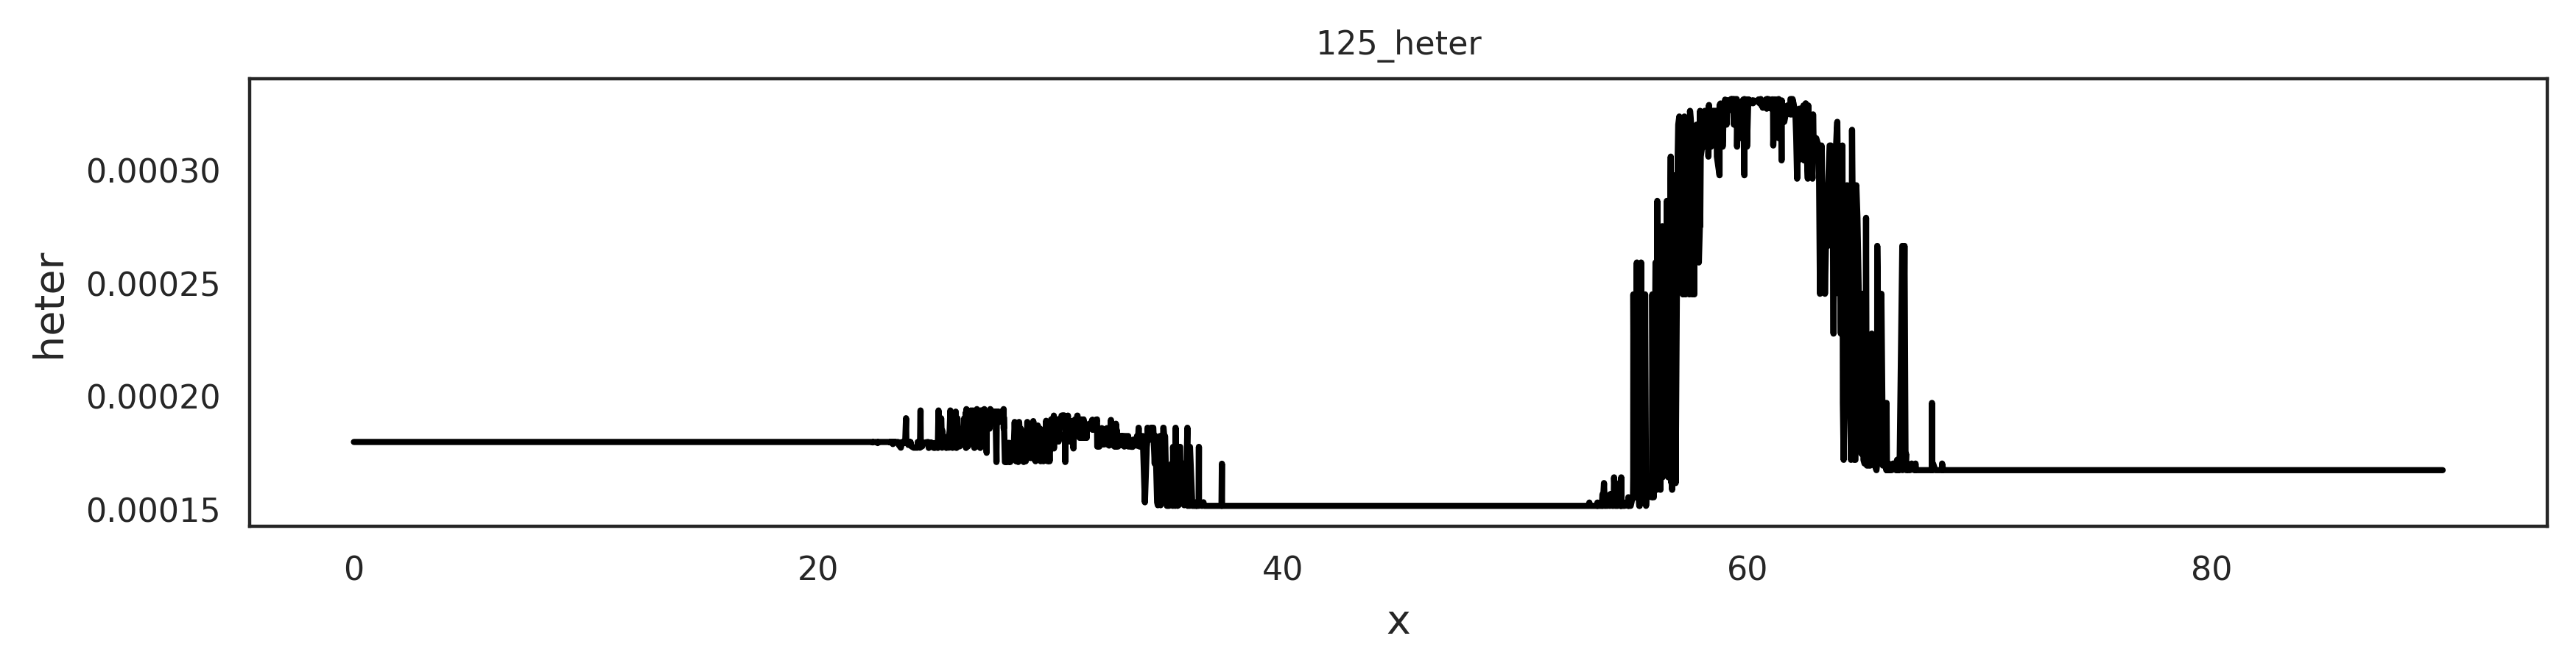

In [127]:
adata_use = adata[adata.obs['batch']=='1']

spatial_mat = adata_use.obsm['spatial']
heter_array = adata_use.obs['DMA_1']
pd_dict = {
    'x':spatial_mat[:,0],
    'y':spatial_mat[:,1],
    'heter':heter_array
}
pd_df = pd.DataFrame(pd_dict)
fig,ax = plt.subplots(1,1,figsize=(10,2))
ax = sns.lineplot(x="x", y="heter",
             # hue="method", 
             # data=pd_df[pd_df['method']!='sum'],
             data=pd_df,
             color='k'
                  
                  # c='k'
            )
plt.title('125_heter')
# ax.get_legend().remove()

In [128]:
np.unique(adata.obs['gt_ct'],return_counts=1)

(array(['Group1', 'Group2', 'Group3'], dtype=object),
 array([1902, 2030, 2068]))

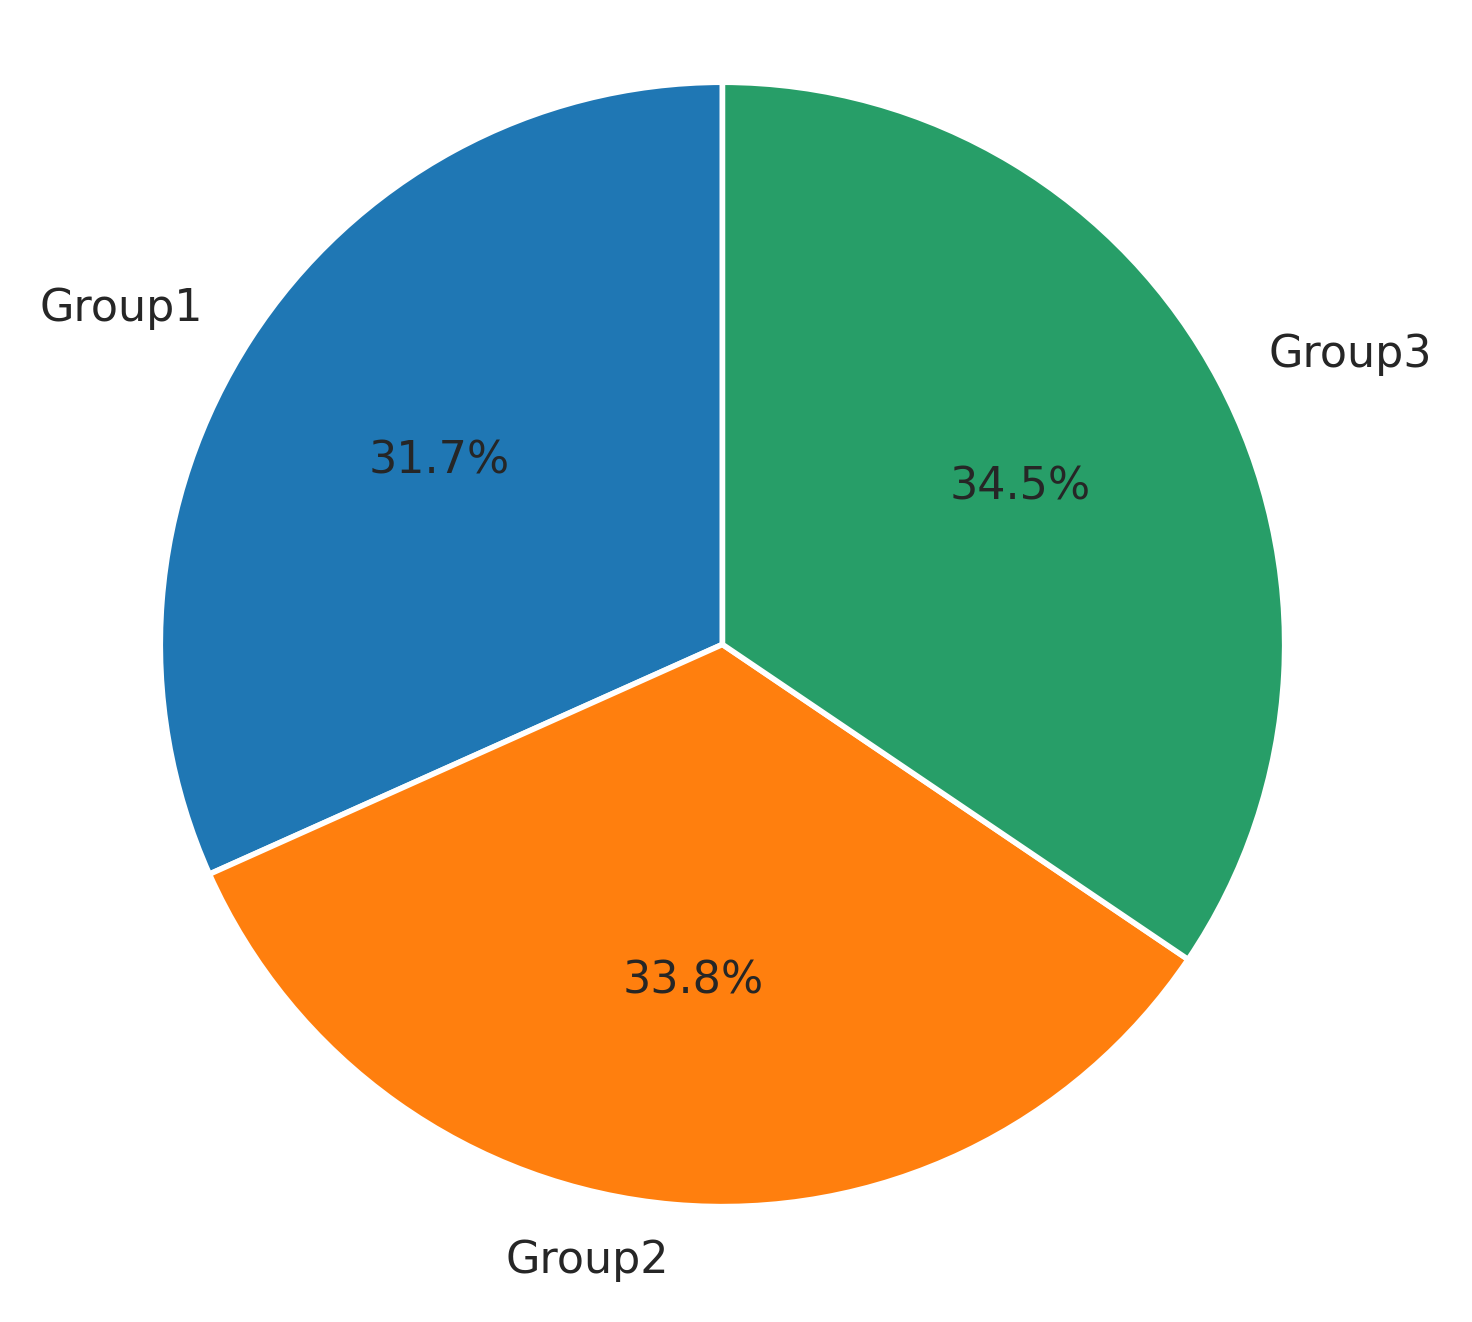

In [130]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = np.unique(adata.obs['gt_ct'],return_counts=1)[0]
sizes = np.unique(adata.obs['gt_ct'],return_counts=1)[1]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()